In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
models = ['rf', 'dt', 'knn', 'xgb', 'lr', 'nb', 'mlp', 'svm']
features = ['%sys', '%memused']

In [17]:
data = {}

for model in models:
    df = pd.read_csv("results/{0}.csv".format(model), sep=';')
    data[model] = {
                    "sys_mean" : df[features].describe()['%sys']['mean'], 
                    "sys_std"  : df[features].describe()['%sys']['std'], 
                    "sys_max"  : df[features].describe()['%sys']['max'], 
                    "sys_min"  : df[features].describe()['%sys']['min'],
                    "mem_mean" : df[features].describe()['%memused']['mean'], 
                    "mem_std"  : df[features].describe()['%memused']['std'], 
                    "mem_max"  : df[features].describe()['%memused']['max'], 
                    "mem_min"  : df[features].describe()['%memused']['min']
                  }


In [23]:
data['rf']['sys_mean']

3.610454545454546

In [37]:
for key,value in data.items():
    print(value['sys_mean'])

3.610454545454546
1.5363636363636362
4.11
3.0399999999999996
1.170909090909091
1.0586363636363636
1.1722727272727271
1.7322727272727276


In [47]:
x_pos = np.arange(len(models))
sys_mean = [value['sys_mean'] for value in data.values()]
sys_std = [value['sys_std'] for value in data.values()]

In [54]:
plt.style.use('plot_style.txt')

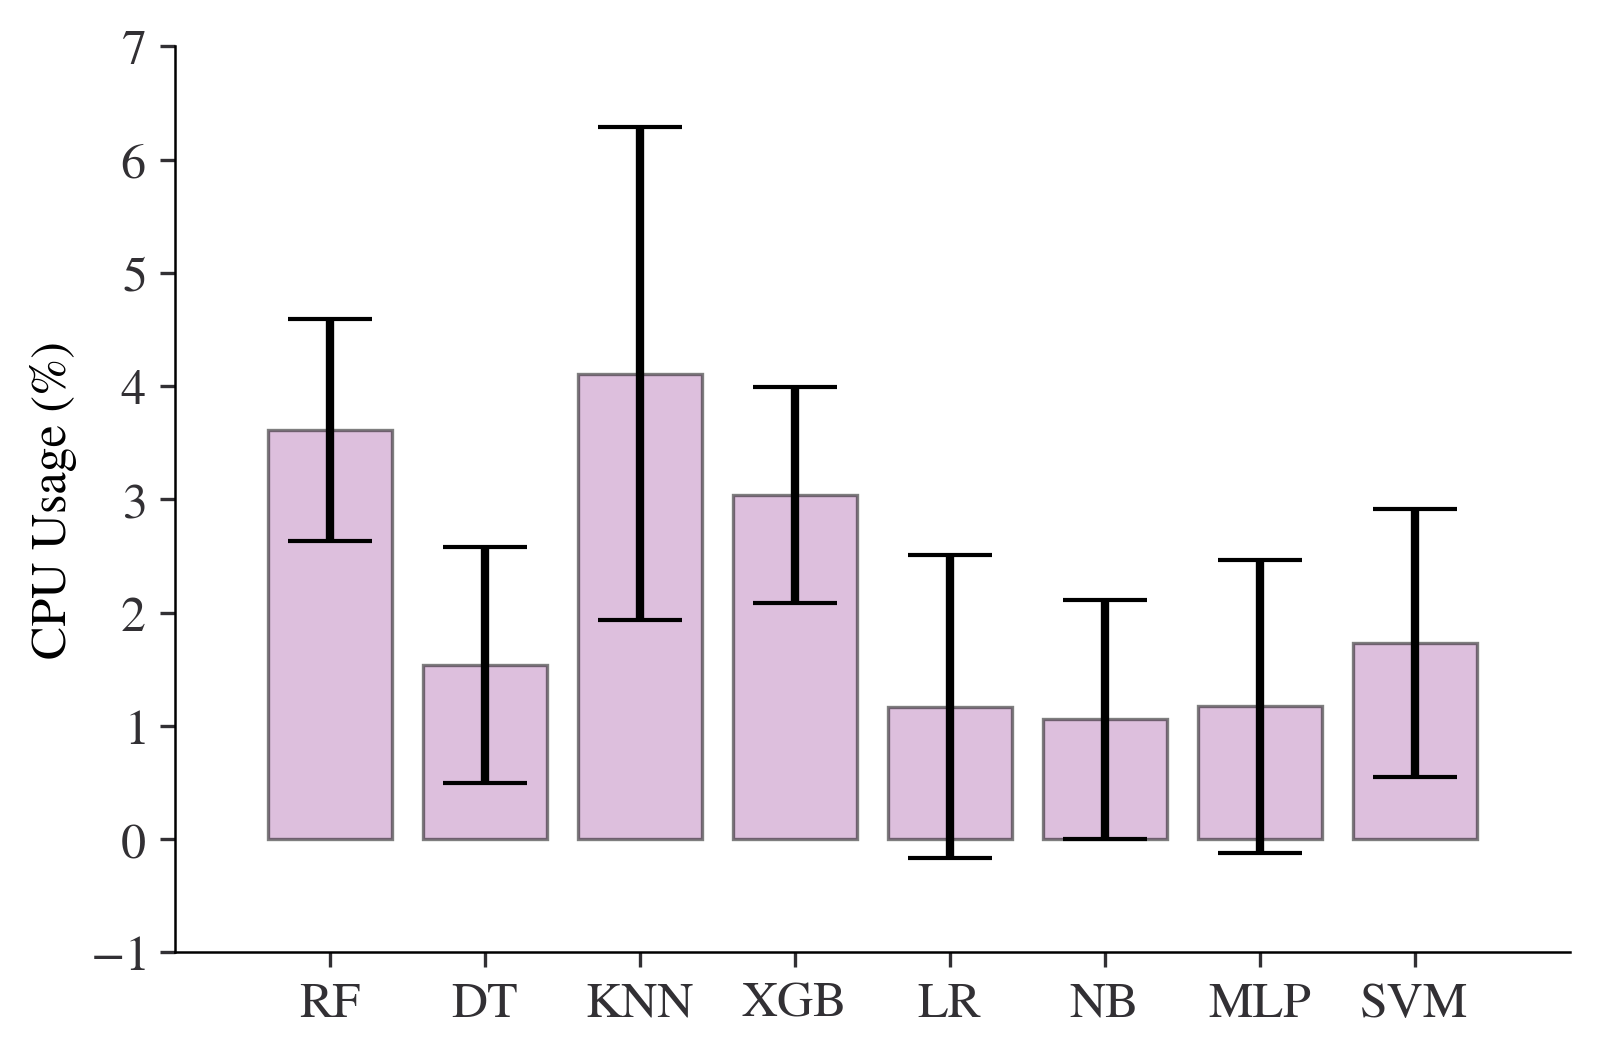

In [59]:
fig, ax = plt.subplots()
ax.bar(x_pos, sys_mean, yerr=sys_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('CPU Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
#plt.savefig(os.path.join('','cpu_usage.pdf'),dpi=300)
plt.show()

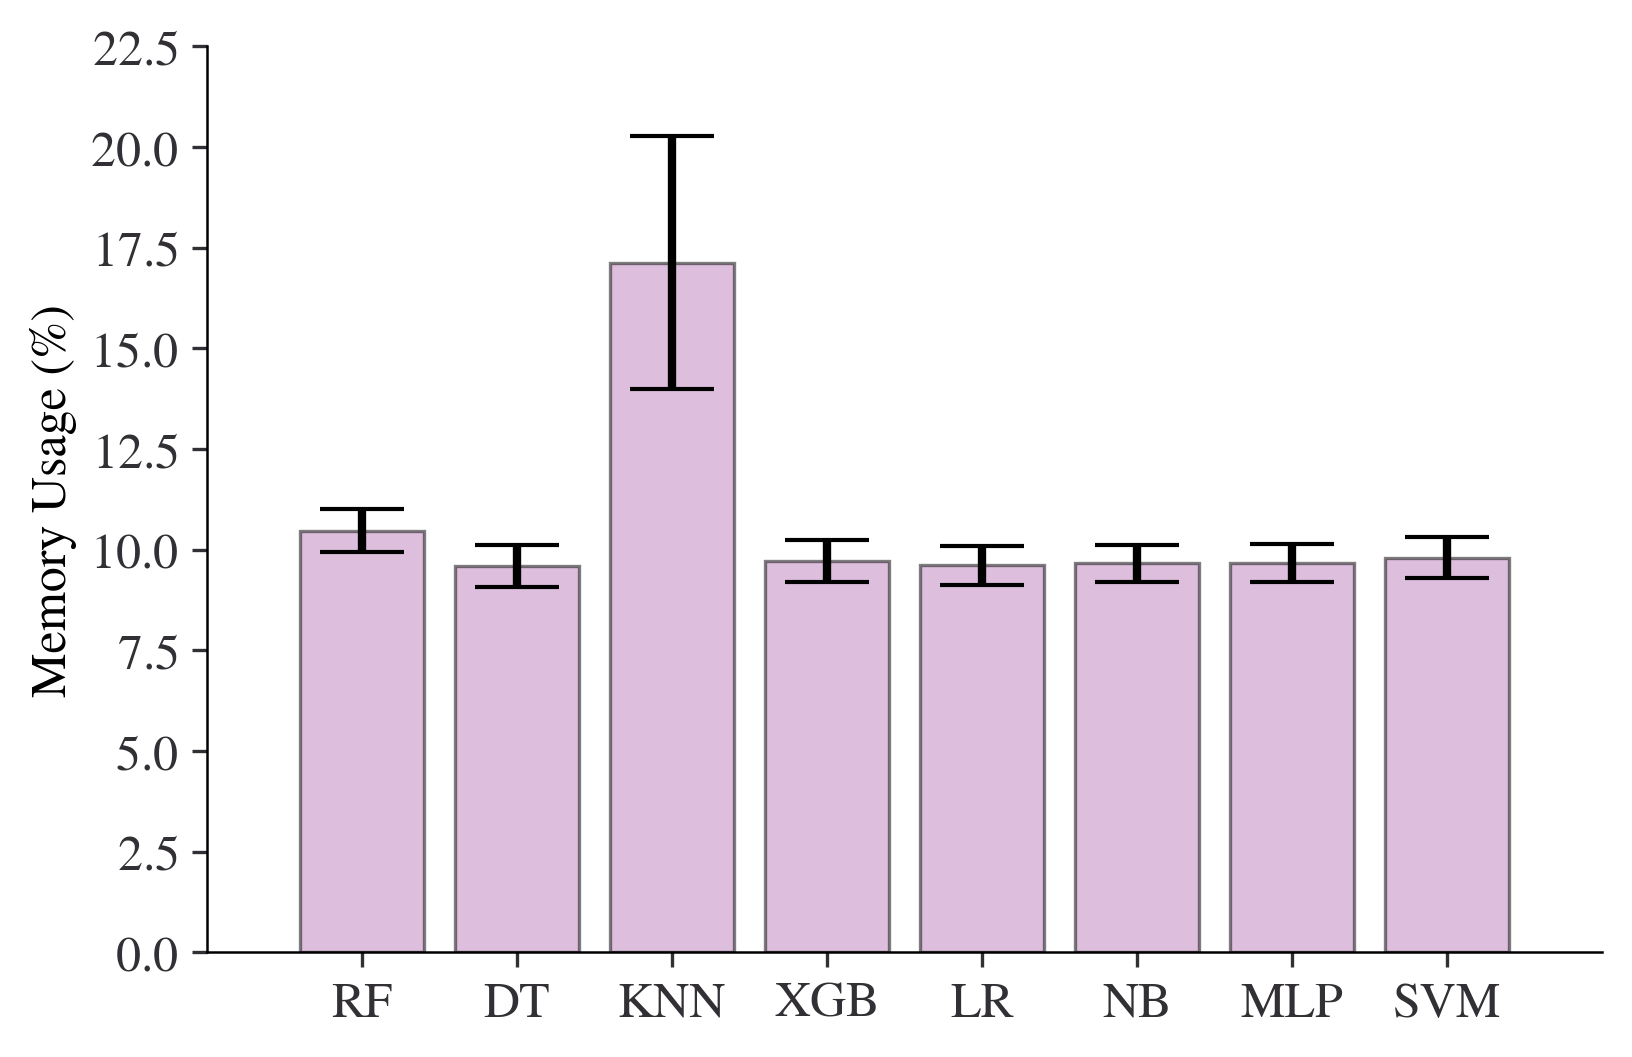

In [58]:
x_pos = np.arange(len(models))
mem_mean = [value['mem_mean'] for value in data.values()]
mem_std = [value['mem_std'] for value in data.values()]

fig, ax = plt.subplots()
ax.bar(x_pos, mem_mean, yerr=mem_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Memory Usage (%)')
ax.set_xticks(x_pos)
ax.set_xticklabels(model.upper() for model in models)
#plt.savefig(os.path.join('','mem_usage.pdf'),dpi=300)
plt.show()